In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import median_filter

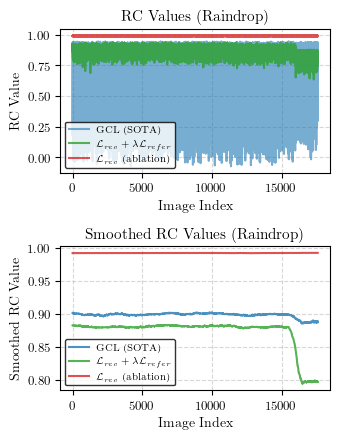

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# --- 数据加载 ---
# Baseline 数据
rc_path_bl = "results_GCL_with_RC_dirtyrain/rc_records.npy"
rc_records_bl = np.load(rc_path_bl, allow_pickle=True).item()
rc_values_bl = rc_records_bl[50][0]  # 原始 RC 值
smoothed_values_bl = rc_records_bl[50][1]  # 平滑后的 RC 值

# MSE + lambda 数据 (dirtyrain_0.1)
rc_path_01 = "dirtyrain_0.1/rc_records.npy"
rc_records_01 = np.load(rc_path_01, allow_pickle=True).item()
rc_values_01, _ = rc_records_01[10]  # 原始 RC 值
smoothed_01 = "dirtyrain_0.1/smoothed_rc_records.npy"
smoothed_records_01 = np.load(smoothed_01, allow_pickle=True).item()
smoothed_values_01, _ = smoothed_records_01[10]  # 平滑后的 RC 值

# MSE 数据 (dirtyrain_0)
rc_path_0 = "dirtyrain_0/rc_records.npy"
rc_records_0 = np.load(rc_path_0, allow_pickle=True).item()
rc_values_0, indices = rc_records_0[100]  # 原始 RC 值和索引
smoothed_0 = "dirtyrain_0/smoothed_rc_records.npy"
smoothed_records_0 = np.load(smoothed_0, allow_pickle=True).item()
smoothed_values_0, _ = smoothed_records_0[100]  # 平滑后的 RC 值

# --- 设置全局绘图参数 (适配 IEEE 论文) ---
plt.rc('text', usetex=True)           # 使用 LaTeX 渲染，确保 Computer Modern 字体
plt.rc('font', family='serif')        # 衬线字体，默认 Computer Modern
plt.rc('font', size=10)               # 正文 10pt
plt.rc('axes', titlesize=11)          # 标题 11pt
plt.rc('axes', labelsize=10)          # 轴标签 10pt
plt.rc('xtick', labelsize=9)          # 刻度 9pt
plt.rc('ytick', labelsize=9)          # 刻度 9pt
plt.rc('legend', fontsize=7)          # 图例 9pt

# --- 创建子图 ---
fig, axes = plt.subplots(2, 1, figsize=(3.5, 4.5))  # 单栏宽度 3.5 英寸，高度适配两个子图

# --- 上子图：原始 RC 值 ---
axes[0].plot(indices, rc_values_bl, label='GCL (SOTA)', color='#1f77b4', linewidth=1.5, alpha=0.6)
axes[0].plot(indices, rc_values_01, label='$\mathcal{L}_{rec} + \lambda \mathcal{L}_{refer}$', color='#2ca02c', linewidth=1.5, alpha=0.8)
axes[0].plot(indices, rc_values_0, label='$\mathcal{L}_{rec}$ (ablation)', color='#d62728', linewidth=1.5, alpha=0.8)

axes[0].set_xlabel('Image Index')
axes[0].set_ylabel('RC Value')
axes[0].set_title('RC Values (Raindrop)', fontweight='bold')  # 加粗标题
# axes[0].set_ylim(0.65, 1)  # 如果需要固定 Y 轴范围，可取消注释
axes[0].grid(True, linestyle='--', alpha=0.5)  # 虚线网格
axes[0].legend(loc='lower left', frameon=True, edgecolor='black')  # 图例优化

# --- 下子图：平滑后的 RC 值 ---
axes[1].plot(indices, smoothed_values_bl, label='GCL (SOTA)', color='#1f77b4', linewidth=1.5, alpha=0.8)
axes[1].plot(indices, smoothed_values_01, label='$\mathcal{L}_{rec} + \lambda \mathcal{L}_{refer}$', color='#2ca02c', linewidth=1.5, alpha=0.8)
axes[1].plot(indices, smoothed_values_0, label='$\mathcal{L}_{rec}$ (ablation)', color='#d62728', linewidth=1.5, alpha=0.8)

axes[1].set_xlabel('Image Index')
axes[1].set_ylabel('Smoothed RC Value')
axes[1].set_title('Smoothed RC Values (Raindrop)', fontweight='bold')  # 加粗标题
# axes[1].set_ylim(0.875, 1)  # 如果需要固定 Y 轴范围，可取消注释
axes[1].grid(True, linestyle='--', alpha=0.5)  # 虚线网格
axes[1].legend(loc='lower left', frameon=True, edgecolor='black')  # 图例优化

# --- 调整布局和保存 ---
plt.tight_layout()  # 自动调整子图间距
plt.savefig('rc_values_comparison1.png', format='png', bbox_inches='tight', dpi=300)  # 保存高质量 PDF
plt.show()

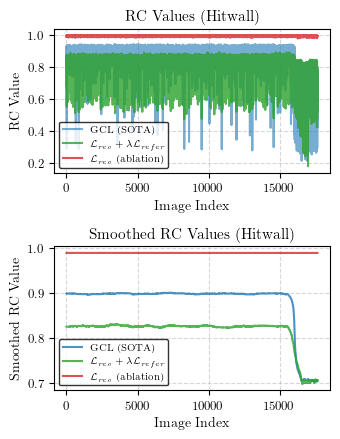

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# --- 数据加载 ---
# Baseline 数据
rc_path_bl = "results_GCL_with_RC_hitwall_new/rc_records.npy"
rc_records_bl = np.load(rc_path_bl, allow_pickle=True).item()
rc_values_bl = rc_records_bl[50][0]  # 原始 RC 值
smoothed_values_bl = rc_records_bl[50][1]  # 平滑后的 RC 值

# MSE + lambda 数据 (dirtyrain_0.1)
rc_path_01 = "old_hitwall_0.1/rc_records.npy"
rc_records_01 = np.load(rc_path_01, allow_pickle=True).item()
rc_values_01, _ = rc_records_01[10]  # 原始 RC 值
smoothed_01 = "old_hitwall_0.1/smoothed_rc_records.npy"
smoothed_records_01 = np.load(smoothed_01, allow_pickle=True).item()
smoothed_values_01, _ = smoothed_records_01[10]  # 平滑后的 RC 值

# MSE 数据 (dirtyrain_0)
rc_path_0 = "old_hitwall_0/rc_records.npy"
rc_records_0 = np.load(rc_path_0, allow_pickle=True).item()
rc_values_0, indices = rc_records_0[100]  # 原始 RC 值和索引
smoothed_0 = "old_hitwall_0/smoothed_rc_records.npy"
smoothed_records_0 = np.load(smoothed_0, allow_pickle=True).item()
smoothed_values_0, _ = smoothed_records_0[100]  # 平滑后的 RC 值

# --- 设置全局绘图参数 (适配 IEEE 论文) ---
plt.rc('text', usetex=True)           # 使用 LaTeX 渲染，确保 Computer Modern 字体
plt.rc('font', family='serif')        # 衬线字体，默认 Computer Modern
plt.rc('font', size=10)               # 正文 10pt
plt.rc('axes', titlesize=11)          # 标题 11pt
plt.rc('axes', labelsize=10)          # 轴标签 10pt
plt.rc('xtick', labelsize=9)          # 刻度 9pt
plt.rc('ytick', labelsize=9)          # 刻度 9pt
plt.rc('legend', fontsize=7)          # 图例 9pt

# --- 创建子图 ---
fig, axes = plt.subplots(2, 1, figsize=(3.5, 4.5))  # 单栏宽度 3.5 英寸，高度适配两个子图

# --- 上子图：原始 RC 值 ---
axes[0].plot(indices, rc_values_bl, label='GCL (SOTA)', color='#1f77b4', linewidth=1.5, alpha=0.6)
axes[0].plot(indices, rc_values_01, label='$\mathcal{L}_{rec} + \lambda \mathcal{L}_{refer}$', color='#2ca02c', linewidth=1.5, alpha=0.8)
axes[0].plot(indices, rc_values_0, label='$\mathcal{L}_{rec}$ (ablation)', color='#d62728', linewidth=1.5, alpha=0.8)

axes[0].set_xlabel('Image Index')
axes[0].set_ylabel('RC Value')
axes[0].set_title('RC Values (Hitwall)', fontweight='bold')  # 加粗标题
# axes[0].set_ylim(0.65, 1)  # 如果需要固定 Y 轴范围，可取消注释
axes[0].grid(True, linestyle='--', alpha=0.5)  # 虚线网格
axes[0].legend(loc='lower left', frameon=True, edgecolor='black')  # 图例优化

# --- 下子图：平滑后的 RC 值 ---
axes[1].plot(indices, smoothed_values_bl, label='GCL (SOTA)', color='#1f77b4', linewidth=1.5, alpha=0.8)
axes[1].plot(indices, smoothed_values_01, label='$\mathcal{L}_{rec} + \lambda \mathcal{L}_{refer}$', color='#2ca02c', linewidth=1.5, alpha=0.8)
axes[1].plot(indices, smoothed_values_0, label='$\mathcal{L}_{rec}$ (ablation)', color='#d62728', linewidth=1.5, alpha=0.8)

axes[1].set_xlabel('Image Index')
axes[1].set_ylabel('Smoothed RC Value')
axes[1].set_title('Smoothed RC Values (Hitwall)', fontweight='bold')  # 加粗标题
# axes[1].set_ylim(0.875, 1)  # 如果需要固定 Y 轴范围，可取消注释
axes[1].grid(True, linestyle='--', alpha=0.5)  # 虚线网格
axes[1].legend(loc='lower left', frameon=True, edgecolor='black')  # 图例优化

# --- 调整布局和保存 ---
plt.tight_layout()  # 自动调整子图间距
plt.savefig('rc_values_comparison2.png', format='png', bbox_inches='tight', dpi=300)  # 保存高质量 PDF
plt.show()

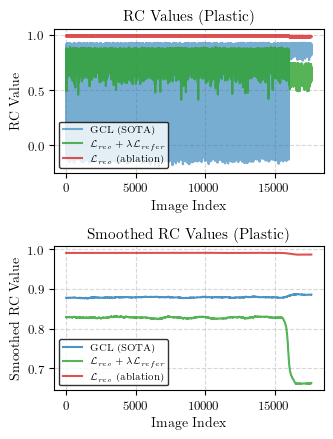

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# --- 数据加载 ---
# Baseline 数据
rc_path_bl = "results_GCL_with_RC_plastic/rc_records.npy"
rc_records_bl = np.load(rc_path_bl, allow_pickle=True).item()
rc_values_bl = rc_records_bl[50][0]  # 原始 RC 值
smoothed_values_bl = rc_records_bl[50][1]  # 平滑后的 RC 值

# MSE + lambda 数据 (dirtyrain_0.1)
rc_path_01 = "plastic_0.1/rc_records.npy"
rc_records_01 = np.load(rc_path_01, allow_pickle=True).item()
rc_values_01, _ = rc_records_01[10]  # 原始 RC 值
smoothed_01 = "plastic_0.1/smoothed_rc_records.npy"
smoothed_records_01 = np.load(smoothed_01, allow_pickle=True).item()
smoothed_values_01, _ = smoothed_records_01[10]  # 平滑后的 RC 值

# MSE 数据 (dirtyrain_0)
rc_path_0 = "plastic_0/rc_records.npy"
rc_records_0 = np.load(rc_path_0, allow_pickle=True).item()
rc_values_0, indices = rc_records_0[100]  # 原始 RC 值和索引
smoothed_0 = "plastic_0/smoothed_rc_records.npy"
smoothed_records_0 = np.load(smoothed_0, allow_pickle=True).item()
smoothed_values_0, _ = smoothed_records_0[100]  # 平滑后的 RC 值

# --- 设置全局绘图参数 (适配 IEEE 论文) ---
plt.rc('text', usetex=True)           # 使用 LaTeX 渲染，确保 Computer Modern 字体
plt.rc('font', family='serif')        # 衬线字体，默认 Computer Modern
plt.rc('font', size=10)               # 正文 10pt
plt.rc('axes', titlesize=11)          # 标题 11pt
plt.rc('axes', labelsize=10)          # 轴标签 10pt
plt.rc('xtick', labelsize=9)          # 刻度 9pt
plt.rc('ytick', labelsize=9)          # 刻度 9pt
plt.rc('legend', fontsize=7)          # 图例 9pt

# --- 创建子图 ---
fig, axes = plt.subplots(2, 1, figsize=(3.5, 4.5))  # 单栏宽度 3.5 英寸，高度适配两个子图

# --- 上子图：原始 RC 值 ---
axes[0].plot(indices, rc_values_bl, label='GCL (SOTA)', color='#1f77b4', linewidth=1.5, alpha=0.6)
axes[0].plot(indices, rc_values_01, label='$\mathcal{L}_{rec} + \lambda \mathcal{L}_{refer}$', color='#2ca02c', linewidth=1.5, alpha=0.8)
axes[0].plot(indices, rc_values_0, label='$\mathcal{L}_{rec}$ (ablation)', color='#d62728', linewidth=1.5, alpha=0.8)

axes[0].set_xlabel('Image Index')
axes[0].set_ylabel('RC Value')
axes[0].set_title('RC Values (Plastic)', fontweight='bold')  # 加粗标题
# axes[0].set_ylim(0.65, 1)  # 如果需要固定 Y 轴范围，可取消注释
axes[0].grid(True, linestyle='--', alpha=0.5)  # 虚线网格
axes[0].legend(loc='lower left', frameon=True, edgecolor='black')  # 图例优化

# --- 下子图：平滑后的 RC 值 ---
axes[1].plot(indices, smoothed_values_bl, label='GCL (SOTA)', color='#1f77b4', linewidth=1.5, alpha=0.8)
axes[1].plot(indices, smoothed_values_01, label='$\mathcal{L}_{rec} + \lambda \mathcal{L}_{refer}$', color='#2ca02c', linewidth=1.5, alpha=0.8)
axes[1].plot(indices, smoothed_values_0, label='$\mathcal{L}_{rec}$ (ablation)', color='#d62728', linewidth=1.5, alpha=0.8)

axes[1].set_xlabel('Image Index')
axes[1].set_ylabel('Smoothed RC Value')
axes[1].set_title('Smoothed RC Values (Plastic)', fontweight='bold')  # 加粗标题
# axes[1].set_ylim(0.875, 1)  # 如果需要固定 Y 轴范围，可取消注释
axes[1].grid(True, linestyle='--', alpha=0.5)  # 虚线网格
axes[1].legend(loc='lower left', frameon=True, edgecolor='black')  # 图例优化

# --- 调整布局和保存 ---
plt.tight_layout()  # 自动调整子图间距
plt.savefig('rc_values_comparison3.png', format='png', bbox_inches='tight', dpi=300)  # 保存高质量 PDF
plt.show()